In [ ]:
import warnings; warnings.simplefilter('ignore')
from pathlib import Path
from PIL import Image

import numpy as np
from sunpy.net import Fido, attrs as a
from sunpy.map import Map

from itipy.download.util import download_url

# SDO/HMI continuum

### JSOC - SDOHMIDownloader

In [ ]:
downloader_f = Path("./data/sdo/hmi/Ic_720s/20231231_235829.fits")

if not downloader_f.exists():
    from itipy.download.download_sdo_hmi import SDOHMIDownloader
    from datetime import datetime

    downloader = SDOHMIDownloader(ds_path="./data/sdo/hmi", email="mgjeon@khu.ac.kr", series=["Ic_720s"])

    d = datetime.strptime("2024-01-01", "%Y-%m-%d")
    downloader.downloadDate(d)

downloader_map = Map(downloader_f)
print("T_REC   :", downloader_map.meta["T_REC"])
print("T_OBS   :", downloader_map.meta["T_OBS"])
print("DATE-OBS:", downloader_map.meta["DATE-OBS"])

2025-02-14 07:24:34,245 - SDOHMIDownloader - INFO - Start download: 2024-01-01T00:00:00
Ic_720s: 100%|██████████| 14.5M/14.5M [00:04<00:00, 3.38MB/s]
2025-02-14 07:24:40,509 - SDOHMIDownloader - INFO - Finished: 2024-01-01T00:00:00


T_REC   : 2024.01.01_00:00:00_TAI
T_OBS   : 2023.12.31_23:59:52_TAI
DATE-OBS: 2023-12-31T23:58:29.60Z


### SunPy - JSOC

In [ ]:
res = Fido.search(a.Time('2024-01-01T00:00:00', '2024-01-01T00:00:05'),
                  a.jsoc.Series('hmi.Ic_720s'),
                  a.jsoc.Notify("mgjeon@khu.ac.kr"),
                  a.jsoc.Segment('continuum'))
res

T_REC,TELESCOP,INSTRUME,WAVELNTH,CAR_ROT
str23,str7,str12,float64,int64
2024.01.01_00:00:00_TAI,SDO/HMI,HMI_COMBINED,6173.0,2279


In [ ]:
res[0][0]

<QueryResponseRow index=0>
        DATE                DATE__OBS                DATE-OBS        TELESCOP   INSTRUME   WAVELNTH CAMERA BUNIT    ORIGIN          CONTENT       QUALITY QUALLEV1                                                       HISTORY                                                                                                                                                                                                                                                 COMMENT                                                                                                                                                                                          BLD_VERS HCAMID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
jsoc_f = Path("./data/sdo/hmi/Ic_720s/hmi.ic_720s.20240101_000000_TAI.3.continuum.fits")

if not jsoc_f.exists():
    Fido.fetch(res, path='./data/sdo/hmi/Ic_720s')

jsoc_map = Map(jsoc_f)
print("T_REC   :", jsoc_map.meta["T_REC"])
print("T_OBS   :", jsoc_map.meta["T_OBS"])
print("DATE-OBS:", jsoc_map.meta["DATE-OBS"])

T_REC   : 2024.01.01_00:00:00.000_TAI
T_OBS   : 2023.12.31_23:59:51.618_TAI
DATE-OBS: 2023-12-31T23:58:29.600


### URL - image

- https://hpde.io/NASA/NumericalData/SDO/HMI/Continuum_Intensity/PT720S.html
- https://jsoc1.stanford.edu/data/hmi/images/
- https://jsoc1.stanford.edu/data/hmi/GS_intensity/

In [ ]:
Ic_url = "https://jsoc1.stanford.edu/data/hmi/images/2024/01/01/20240101_000000_Ic_4k.jpg"
Ic_f = Path("./data/sdo/hmi/Ic_720s/20240101_000000_Ic_4k.jpg")

if not Ic_f.exists():
    download_url(url=Ic_url, filename=Ic_f)

img_Ic = Image.open(Ic_f)

20240101_000000_Ic_4k.jpg: 100%|██████████| 3.55M/3.55M [00:01<00:00, 2.13MB/s]


In [ ]:
Icflat_url = "https://jsoc1.stanford.edu/data/hmi/images/2024/01/01/20240101_000000_Ic_flat_4k.jpg"
Icflat_f = Path("./data/sdo/hmi/Ic_720s/20240101_000000_Ic_flat_4k.jpg")

if not Icflat_f.exists():
    download_url(url=Icflat_url, filename=Icflat_f)

img_Ic_flat = Image.open(Icflat_f)

20240101_000000_Ic_flat_4k.jpg: 100%|██████████| 5.05M/5.05M [00:02<00:00, 2.39MB/s]


In [ ]:
GS_url = "https://jsoc1.stanford.edu/data/hmi/GS_intensity/2024/01/01/hmi.Ic_2024.01.01_00%3A00%3A00_TAI_4096x4096.gif"
GS_f = Path("./data/sdo/hmi/Ic_720s/hmi.Ic_2024.01.01_00:00:00_TAI_4096x4096.gif")

if not GS_f.exists():
    download_url(url=GS_url, filename=GS_f)

img_GS_Ic = Image.open(GS_f)

hmi.Ic_2024.01.01_00%3A00%3A00_TAI_4096x4096.gif: 100%|██████████| 9.58M/9.58M [00:02<00:00, 3.70MB/s]


## Comparison

In [ ]:
print("Dwonloader")
print(downloader_map.meta["DATE-OBS"])
print(downloader_map.data.shape, np.nanmin(downloader_map.data), np.nanmax(downloader_map.data))
print(downloader_map.rotation_matrix)
print()
print("JSOC")
print(jsoc_map.meta["DATE-OBS"])
print(jsoc_map.data.shape, np.nanmin(jsoc_map.data), np.nanmax(jsoc_map.data))
print(jsoc_map.rotation_matrix)
print()
print("JPG Ic")
print(img_Ic.size, np.array(img_Ic).min(), np.array(img_Ic).max())
print()
print("JPG Ic flat")
print(img_Ic_flat.size, np.array(img_Ic_flat).min(), np.array(img_Ic_flat).max())
print()
print("GIF Ic")
print(img_GS_Ic.size, np.array(img_GS_Ic).min(), np.array(img_GS_Ic).max())
print()

Dwonloader
2023-12-31T23:58:29.60Z
(4096, 4096) 140.0 52238.0
[[-9.99999972e-01  2.34886409e-04]
 [-2.34886409e-04 -9.99999972e-01]]

JSOC
2023-12-31T23:58:29.600
(4096, 4096) 140.0 52238.0
[[-9.99999972e-01  2.34886409e-04]
 [-2.34886409e-04 -9.99999972e-01]]

JPG Ic
(4096, 4096) 0 255

JPG Ic flat
(4096, 4096) 0 255

GIF Ic
(4096, 4096) 0 255



In [ ]:
print("Downloader == JSOC:", np.allclose(downloader_map.data, jsoc_map.data, equal_nan=True))

Downloader == JSOC: True


### Peek

In [ ]:
import matplotlib.pyplot as plt

Downloader


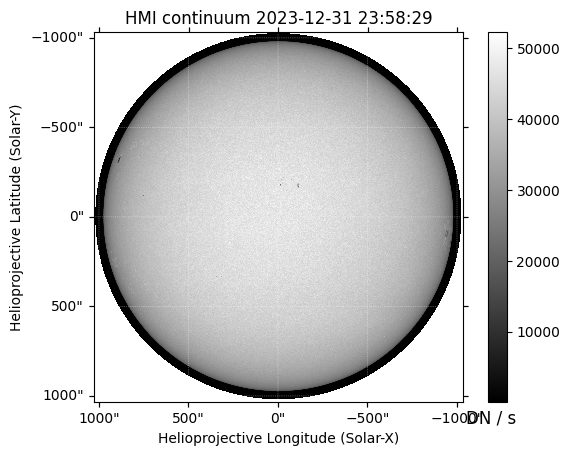

JSOC


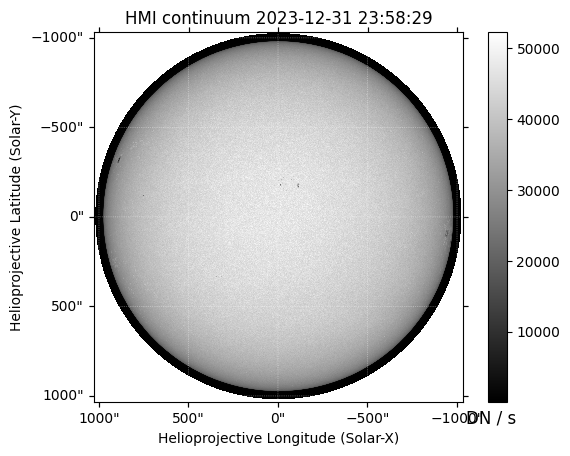

JPG Ic


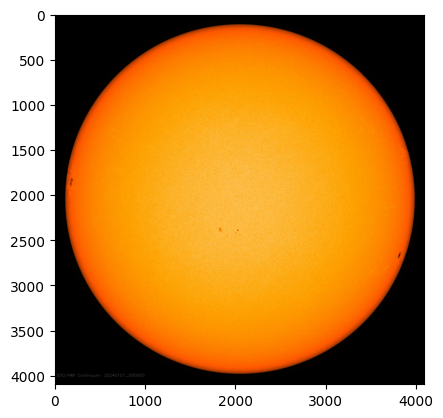

JPG Ic flat


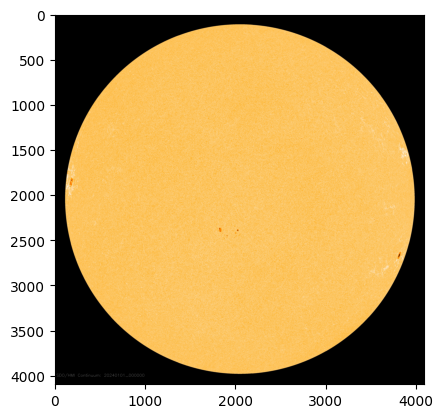

GIF Ic


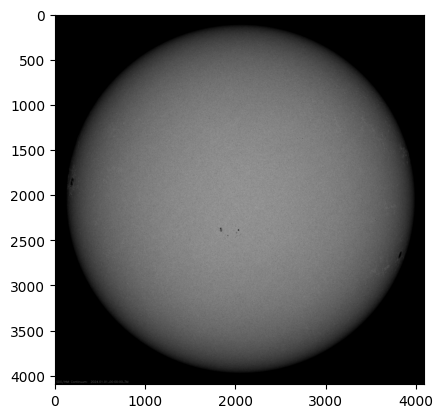

In [ ]:
print("Downloader")
downloader_map.peek()
print("JSOC")
jsoc_map.peek()
print("JPG Ic")
plt.imshow(np.array(img_Ic.convert("RGB")))
plt.show()
print("JPG Ic flat")
plt.imshow(np.array(img_Ic_flat.convert("RGB")))
plt.show()
print("GIF Ic")
plt.imshow(np.array(img_GS_Ic.convert("RGB")))
plt.show()

### Meta

In [ ]:
print("Downloader")
print(downloader_map.meta)
print()
print("JSOC")
print(jsoc_map.meta)
print()

Downloader
('simple': 'True')
('bitpix': '16')
('naxis': '2')
('naxis1': '4096')
('naxis2': '4096')
('blank': '-32768')
('bzero': '97304.0')
('bscale': '3.0')
('checksum': '86UbA6RZ16Ra86RY')
('datasum': '894364521')
('date': '2024-01-05T17:25:35Z')
('date-obs': '2023-12-31T23:58:29.60Z')
('telescop': 'SDO/HMI')
('instrume': 'HMI_COMBINED')
('wavelnth': '6173.0')
('camera': '3')
('bunit': 'DN/s')
('origin': 'SDO/JSOC-SDP')
('content': 'CONTINUUM INTENSITY')
('quality': '0')
('quallev1': '0')
('bld_vers': '-905')
('hcamid': '2')
('source': 'hmi.lev1[:#324457287,#324457239,#324457179,#324457143,#324457095,#324457035,#324456987,#324456951,#324457311,#324457383,#324457431,#324457467,#324457527,#324457563,#324457288,#324457240,#324457180,#324457144,#324457096,#324457036,#324456988,#324456952,#324457312,#324457384,#324457432,#324457468,#324457528,#324457564,#324457289,#324457241,#324457181,#324457145,#324457097,#324457037,#324456989,#324456953,#324457313,#324457385,#324457433,#324457469,#324